# Extract List of most abundant Species or Types present within the two regimes
## Both PHYTO and ZOO


In [1]:
require(tidyverse, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

library(scales, warn.conflicts = FALSE)

Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: cowplot


## First of all, let's read all data

In [2]:
#PhytoAbundances
phyto_filtered <- read.csv("DATA_processed/PhytoAbund_filtered.csv")
phyto_filtered$date <- as.Date(phyto_filtered$date, format="%Y-%m-%d")

#PhytoAbundances above MLD
phyto_above_MLD <- read.csv("DATA_processed/Phyto_above_MLD.csv")
phyto_above_MLD$date <- as.Date(phyto_above_MLD$Date, format="%Y-%m-%d")

#Zooplankton
zoo <- read.csv("DATA_processed/Master_Zooplankton_Nov2017_Cleaned.csv")
zoo$date <- as.Date(zoo$Date, format="%Y-%m-%d")

# Phytoplankton Abundances above MLD

In [3]:
names(phyto_above_MLD)

[1] "X"          "Date"       "X.1.x"      "X.x"        "CruiseID.x"
 [6] "lon.x"      "lat.x"      "date"       "month.x"    "year"      
[11] "depth"      "taxon"      "group"      "abundance"  "X.1.y"     
[16] "X.y"        "CruiseID.y" "month.y"    "days"       "press"     
[21] "lat.y"      "lon.y"      "sigma_t"    "sigma_0"    "potemp"    
[26] "sal"        "temp"       "beam_att"   "beam_cp"    "fluor_chla"
[31] "belowmld"   "depthdiff"

In [21]:
PhyAboveMLDdf <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  select(Date, group, taxon, abundance, depth) %>%
  gather(key='key',value = "value", -depth, -group, -taxon, -Date)
PhyAboveMLDdf$Date <- as.Date(PhyAboveMLDdf$Date)
head(PhyAboveMLDdf)

Date,group,taxon,depth,key,value
1999-02-10,DIATOMS,Amphora_sp.,1,abundance,0.000
1999-02-10,DIATOMS,Asterionellopsis_glacialis,1,abundance,0.000
1999-02-10,DIATOMS,Asterolampra_sp.,1,abundance,0.000
1999-02-10,DIATOMS,Asteromphallus_flabelatus,1,abundance,0.000
1999-02-10,DIATOMS,Bacteriastrum_delicatulu,1,abundance,6.875
1999-02-10,DIATOMS,Bacteriastrum_elongatu,1,abundance,0.000


In [22]:
#split data into two regimes:
Phy_R1 <- PhyAboveMLDdf[!PhyAboveMLDdf$Date>as.Date('2000-10-30') & !PhyAboveMLDdf$Date<as.Date('1996-01-01'),]
Phy_R2 <- PhyAboveMLDdf[!PhyAboveMLDdf$Date<as.Date('2006-07-31') & !PhyAboveMLDdf$Date>as.Date('2010-12-31'),]


In [24]:
str(Phy_R1)

'data.frame':	50442 obs. of  6 variables:
 $ Date : Date, format: "1999-02-10" "1999-02-10" ...
 $ group: Factor w/ 7 levels "COCCOLITHOPHORIDS",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ taxon: Factor w/ 960 levels "Acanthoica_cuatrospina",..: 22 32 39 40 43 44 45 46 54 76 ...
 $ depth: int  1 1 1 1 1 1 1 1 1 1 ...
 $ key  : chr  "abundance" "abundance" "abundance" "abundance" ...
 $ value: num  0 0 0 0 6.88 ...


In [35]:
PhyTaxonsR1 <- Phy_R1 %>%
  group_by(taxon,group) %>%
  summarize(TaxAbund = sum(value)) %>%
  select(group, taxon, TaxAbund) %>%
  arrange(desc(TaxAbund)) %>%
  gather(key='key',value = "value", -taxon, -group)

head(PhyTaxonsR1)

group,taxon,key,value
NANOFLAGELLATES,nanoflagellates,TaxAbund,44553.826
DIATOMS,Pseudonitzschia_sp.,TaxAbund,13855.561
DIATOMS,Skeletonema_costatu,TaxAbund,9844.966
DIATOMS,Leptocilindrus_danicus,TaxAbund,4352.934
DIATOMS,Pseudonitzschia_sp,TaxAbund,2333.828
COCCOLITHOPHORIDS,Emiliania-Gephyrocapsa,TaxAbund,2157.627


In [36]:
PhyTaxonsR2 <- Phy_R2 %>%
  group_by(taxon, group) %>%
  summarize(TaxAbund = sum(value)) %>%
  select(group, taxon, TaxAbund) %>%
  arrange(desc(TaxAbund)) %>%
  gather(key='key',value = "value", -taxon, -group)

head(PhyTaxonsR2)

group,taxon,key,value
NANOFLAGELLATES,nanoflagellates,TaxAbund,21081.23
COCCOLITHOPHORIDS,Emiliania-Gephyrocapsa,TaxAbund,717.87
DIATOMS,Pseudonitzschia_pseudodelicatissima,TaxAbund,695.88
DIATOMS,Thalassiosira_subtilis,TaxAbund,201.99
DIATOMS,Leptocylindrus_minimus,TaxAbund,119.20
DIATOMS,Chaetoceros_compressu,TaxAbund,113.69


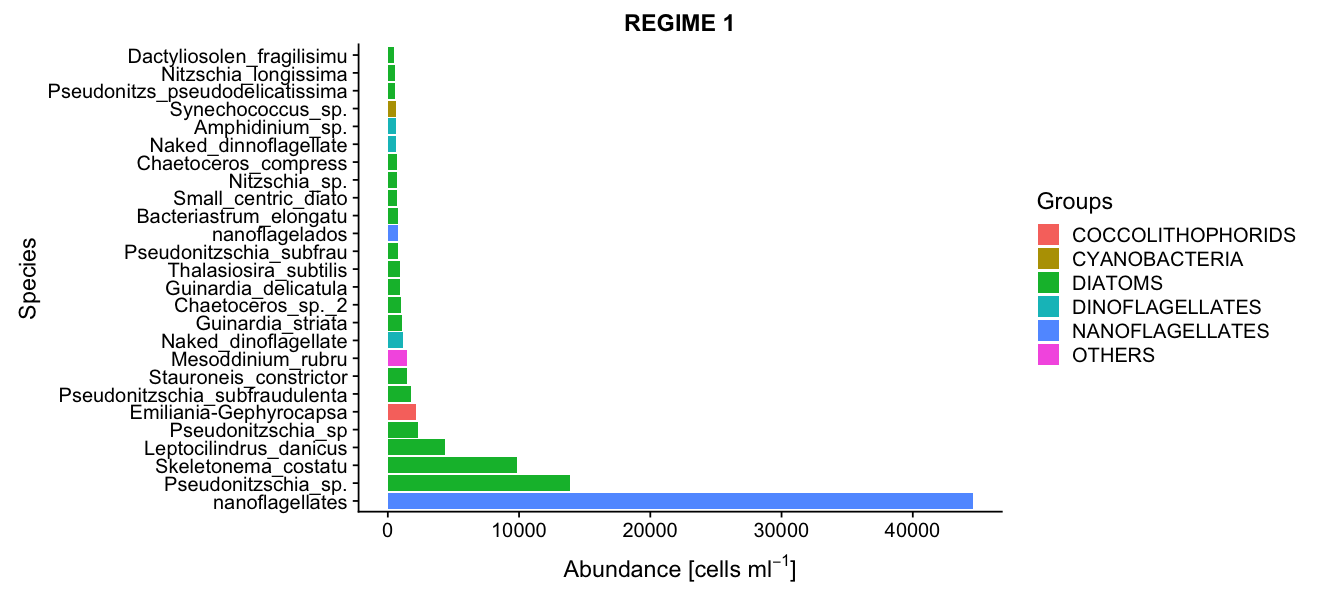

In [43]:
PhyTaxonsR1$taxon <- factor(PhyTaxonsR1$taxon, levels = unique(PhyTaxonsR1$taxon))

options(repr.plot.width=11, repr.plot.height=5)

ggplot(PhyTaxonsR1[1:26,], aes(x=taxon,y=value)) + geom_bar(aes(fill=group),stat = "identity")+ 
  xlab('Species') + ylab(expression(paste("Abundance [cells ",ml^{-1},']')))+
  coord_flip() + labs(fill = "Groups") + ggtitle("REGIME 1")

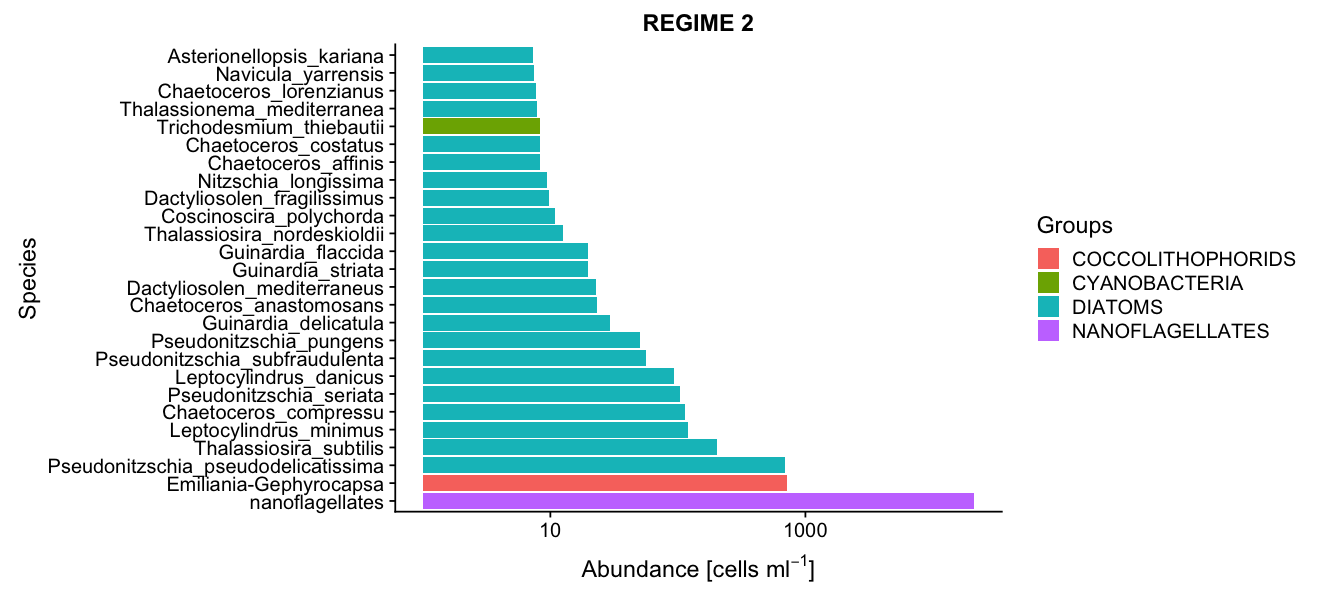

In [44]:
PhyTaxonsR2$taxon <- factor(PhyTaxonsR2$taxon, levels = unique(PhyTaxonsR2$taxon))

options(repr.plot.width=11, repr.plot.height=5)

ggplot(PhyTaxonsR2[1:26,], aes(x=taxon,y=value)) + geom_bar(aes(fill=group),stat = "identity")+ 
  xlab('Species') + ylab(expression(paste("Abundance [cells ",ml^{-1},']')))+ scale_y_log10() +
  coord_flip() + labs(fill = "Groups") + ggtitle("REGIME 2")

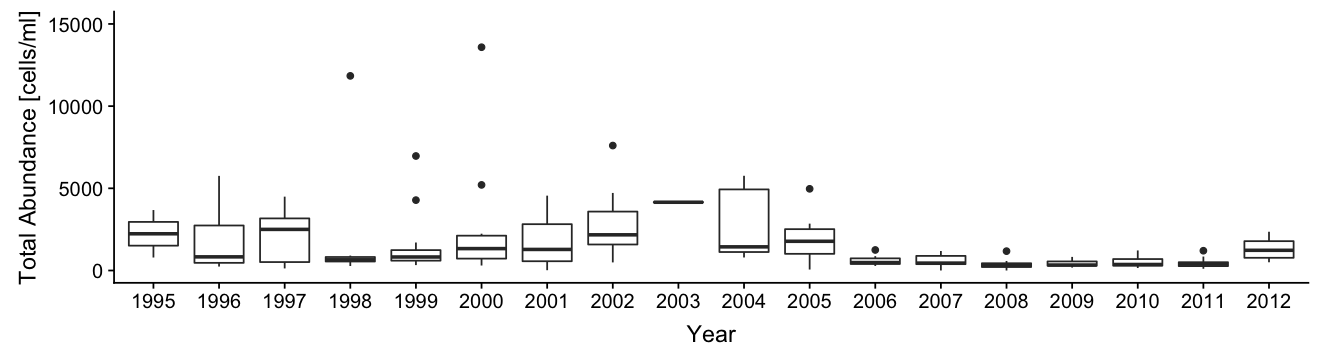

In [383]:
PhyTotabovedf_ALLTOT <- PhyTotAbundabovedf
PhyTotabovedf_ALLTOT$monthyear <- as.Date(format(PhyTotAbundabovedf$Date, format="%Y-%m"), format="%m-%d")
PhyTotabovedf_ALLTOT$year <- as.numeric(format(PhyTotAbundabovedf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(PhyTotabovedf_ALLTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ 
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Total Abundance [cells/ml]') + xlab('Year')+ ylim(0,15000)

In [384]:
ggsave('PLOTS/TotAbund_ABOVE_BOXPLOT_total.png', width=11, height= 3)

In [378]:
#PhytoAbundances above MLD
Phyto_below_MLD <- read.csv("DATA_processed/Phyto_below_MLD.csv")
Phyto_below_MLD$date <- as.Date(Phyto_below_MLD$Date, format="%Y-%m-%d")


In [379]:
PhyTotAbundbelowdf <- Phyto_below_MLD[!Phyto_below_MLD$group == 'TOTAL',] %>%
  group_by(Date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(Date, TotAbund) %>%
  gather(key='key',value = "value", -Date)
PhyTotAbundbelowdf$Date <- as.Date(PhyTotAbundbelowdf$Date)
str(PhyTotAbundbelowdf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  3 variables:
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  1329 2285 5444 3910 1184 ...


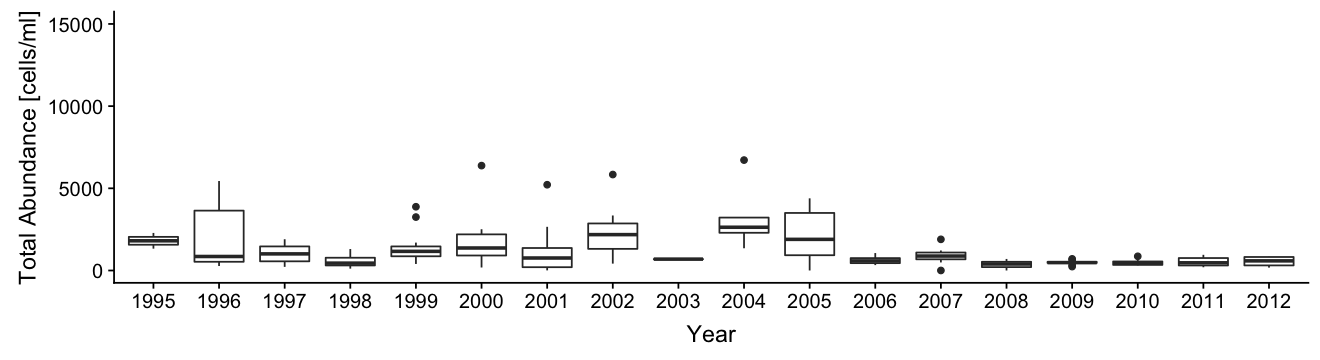

In [385]:
PhyTotbelowdf_ALLTOT <- PhyTotAbundbelowdf
PhyTotbelowdf_ALLTOT$monthyear <- as.Date(format(PhyTotAbundbelowdf$Date, format="%Y-%m"), format="%m-%d")
PhyTotbelowdf_ALLTOT$year <- as.numeric(format(PhyTotAbundbelowdf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=3)
# plot boxplot of distribution over the year per group
ggplot(PhyTotbelowdf_ALLTOT) + geom_boxplot(aes(x=reorder(year,monthyear), y=value))+ 
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Total Abundance [cells/ml]') + xlab('Year') + ylim(0,15000)

In [386]:
ggsave('PLOTS/TotAbund_BELOW_BOXPLOT_total.png', width=11, height= 3)

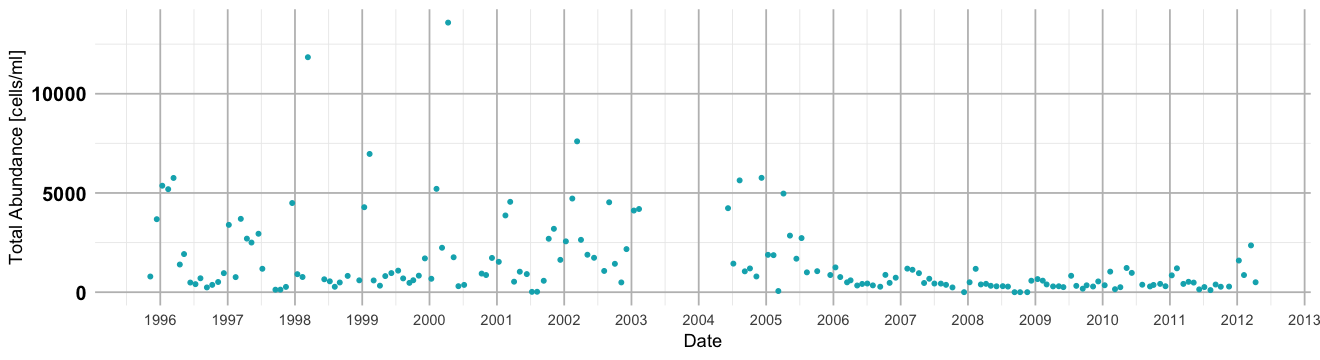

In [374]:
ggplot(PhyTotAbundabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y')+
    ylab('Total Abundance [cells/ml]') + theme(legend.position = "none") + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [375]:
ggsave('PLOTS/Phyto_Tot_Abund_aboveMLD.png', width=11, height= 3)

In [376]:
PhyTotAbunddf <- phyto_filtered[!phyto_filtered$group == 'TOTAL',] %>%
  group_by(date) %>%
  summarize(TotAbund = sum(abundance)) %>%
  select(date, TotAbund) %>%
  gather(key='key',value = "value", -date)
PhyTotAbunddf$Date <- as.Date(PhyTotAbunddf$date)
str(PhyTotAbunddf)

Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	170 obs. of  4 variables:
 $ date : Date, format: "1995-11-08" "1995-12-13" ...
 $ key  : chr  "TotAbund" "TotAbund" "TotAbund" "TotAbund" ...
 $ value: num  2119 5964 10810 9100 6941 ...
 $ Date : Date, format: "1995-11-08" "1995-12-13" ...


Warning message in value - PhyGroupAbundabovedf$value:
“longer object length is not a multiple of shorter object length”Warning message in value - PhyGroupAbundabovedf$value:
“longer object length is not a multiple of shorter object length”ERROR while rich displaying an object: Error: Aesthetics must be either length 1 or the same as the data (170): colour, x, y

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.defaul

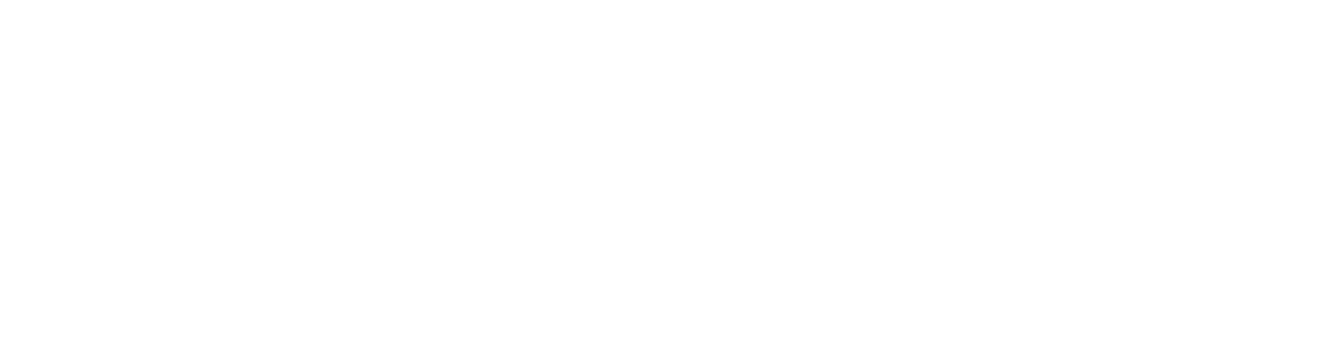

In [377]:
ggplot(PhyTotAbunddf, aes(x = Date, y = value)) + 
  geom_point(aes(color = key), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y')+
    ylab('Total Abundance [cells/ml]') + theme(legend.position = "none")  + theme(legend.position = "none", 
                                     axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [136]:
ggsave('PLOTS/Phyto_Tot_Abund_allDEPTH.png', width=11, height= 3)

In [262]:
PhyGroupAbundabovedf <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(Date,group) %>%
  summarize(GroupAbund = sum(abundance)) %>%
  select(Date, group, GroupAbund) %>%
  gather(key='key',value = "value", -Date,-group)
PhyGroupAbundabovedf$Date <- as.Date(PhyGroupAbundabovedf$Date)
head(PhyGroupAbundabovedf)

Date,group,key,value
1995-11-08,COCCOLITHOPHORIDS,GroupAbund,1.000
1995-11-08,CYANOBACTERIA,GroupAbund,2.500
1995-11-08,DIATOMS,GroupAbund,228.125
1995-11-08,DINOFLAGELLATES,GroupAbund,45.000
1995-11-08,NANOFLAGELLATES,GroupAbund,513.218
1995-11-08,OTHERS,GroupAbund,0.000


Warning message:
“Transformation introduced infinite values in continuous y-axis”

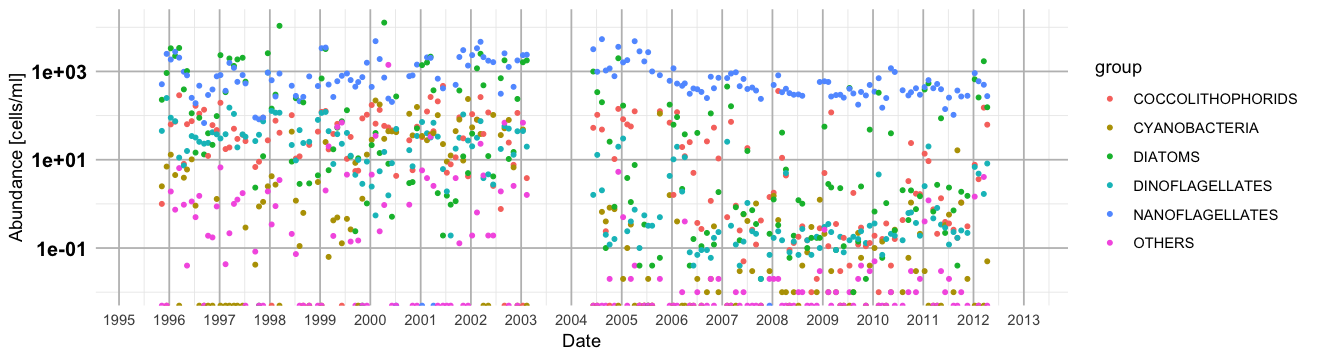

In [142]:
ggplot(PhyGroupAbundabovedf, aes(x = Date, y = value)) + 
  geom_point(aes(color = group), size = 1) + 
  #scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+ scale_y_log10()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Abundance [cells/ml]') + theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))

In [143]:
ggsave('PLOTS/Phyto_PerGROUP_Abund_aboveMLD.png', width=11, height= 3)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

 # SPECIES PER GROUP FOR RANKING

In [260]:
PhyGrouptotabund <- phyto_above_MLD[!phyto_above_MLD$group == 'TOTAL',] %>%
  group_by(group) %>%
  summarize(GroupAbund = sum(abundance)) %>%
  select(group, GroupAbund) %>%
  gather(key='key',value = "value",-group)
#PhyGroupAbundabovedf$Date <- as.Date(PhyGroupAbundabovedf$Date)
head(PhyGrouptotabund)

group,key,value
COCCOLITHOPHORIDS,GroupAbund,7250.349
CYANOBACTERIA,GroupAbund,2348.154
DIATOMS,GroupAbund,80008.609
DINOFLAGELLATES,GroupAbund,4375.259
NANOFLAGELLATES,GroupAbund,154883.941
OTHERS,GroupAbund,1870.889


In [183]:
head(PhyGroupAbundabovedf$group)

[1] COCCOLITHOPHORIDS CYANOBACTERIA     DIATOMS           DINOFLAGELLATES  
[5] NANOFLAGELLATES   OTHERS           
7 Levels: COCCOLITHOPHORIDS CYANOBACTERIA DIATOMS ... TOTAL

Warning message:
“Transformation introduced infinite values in continuous y-axis”

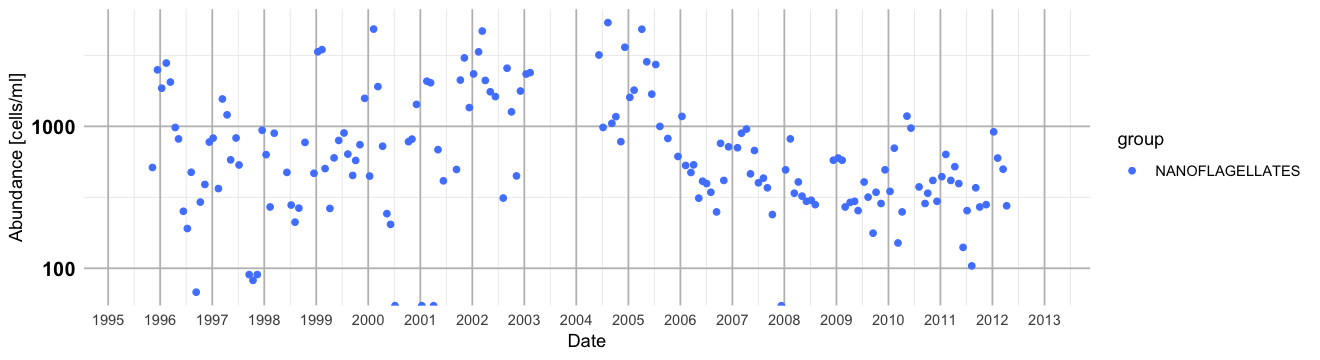

In [263]:
options(repr.plot.width=11, repr.plot.height=3)
facets <- c("COCCOLITHOPHORIDS", "CYANOBACTERIA", "DIATOMS", "DINOFLAGELLATES", "NANOFLAGELLATES","OTHERS")
colors <- c('#f35e5a','#a89005','#17b12b','#17b3b7','#5086ff','#ef43dc')
names(colors) <- facets

# plot each group inidividually 
ggplot(PhyGroupAbundabovedf[PhyGroupAbundabovedf$group == facets[5],], aes(x = Date, y = value, col=group)) + 
  geom_point() + 
  scale_color_manual(values = colors) +
  theme_minimal()+ scale_y_log10()+
  theme(panel.grid.major = element_line(colour = 'grey')) + 
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y', limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab('Abundance [cells/ml]') + theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))

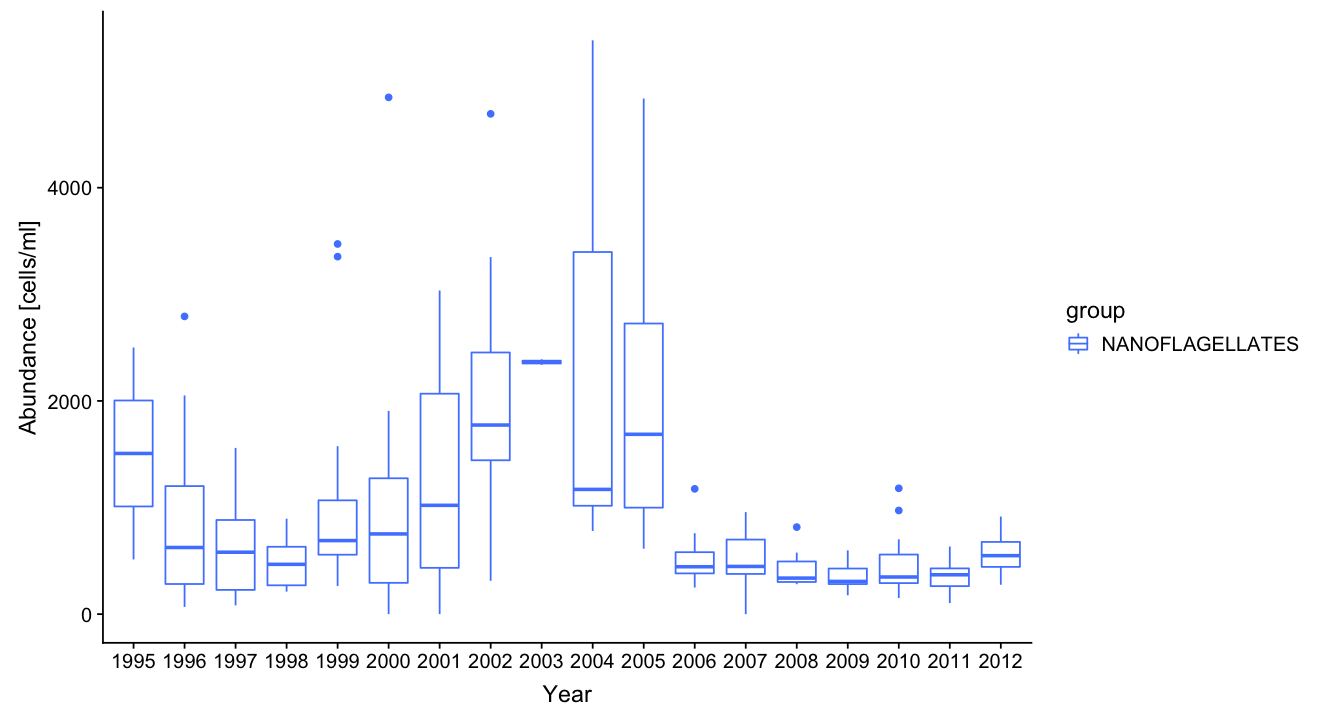

In [285]:
PhyGroupabovedf_ALLTOT <- PhyGroupAbundabovedf
PhyGroupabovedf_ALLTOT$monthyear <- as.Date(format(PhyGroupAbundabovedf$Date, format="%Y-%m"), format="%m-%d")
PhyGroupabovedf_ALLTOT$year <- as.numeric(format(PhyGroupAbundabovedf$Date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=6)
# plot boxplot of distribution over the year per group
ggplot(PhyGroupabovedf_ALLTOT[PhyGroupabovedf_ALLTOT$group == facets[5],]) + 
geom_boxplot(aes(x=reorder(year,monthyear), y=value, col=group))+ 
scale_color_manual(values = colors) +
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Abundance [cells/ml]') + xlab('Year')

In [286]:
ggsave('PLOTS/Phyto_TIMESERIES_NANO.png', width=11, height= 6)

In [287]:
#split data into two regimes:
PGA_R1 <- PhyGroupAbundabovedf[!PhyGroupAbundabovedf$Date>as.Date('2000-10-30') & !PhyGroupAbundabovedf$Date<as.Date('1996-01-01'),]
PGA_R2 <- PhyGroupAbundabovedf[!PhyGroupAbundabovedf$Date<as.Date('2006-07-31') & !PhyGroupAbundabovedf$Date>as.Date('2010-12-31'),]




In [288]:
# create day of year and month columsn for aggregate plotting
PGA_R1$dyear <- as.Date(format(PGA_R1$Date, format="%m-%d"),format="%m-%d")
PGA_R2$dyear <- as.Date(format(PGA_R2$Date, format="%m-%d"),format="%m-%d")
PGA_R1$month <- format(PGA_R1$Date, format="%m")
PGA_R2$month <- format(PGA_R2$Date, format="%m")

In [328]:
options(repr.plot.width=11, repr.plot.height=3)

pf <- facets[5]

PGA1 <- ggplot() + geom_point(data=PGA_R1[PGA_R1$group == pf,],aes(x=dyear, y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_point(data=PGA_R2[PGA_R2$group == pf,],aes(x=dyear, y=value, col='Regime 2')) + 
scale_x_date(date_breaks = "months", labels = date_format('%m'))+
ylab('Abundance [cells/ml]') + xlab('Month of year') + labs(col='Regime')

In [329]:
PGA2 <- ggplot() + geom_boxplot(data=PGA_R1[PGA_R1$group == pf,],aes(x=reorder(month,dyear), y=value, col='Regime 1'))+ #scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
geom_boxplot(data=PGA_R2[PGA_R2$group == pf,],aes(x=reorder(month,dyear), y=value, col='Regime 2'), alpha=0.5)+ 
#scale_x_continous(breaks = "months", labels = date_format('%m'))+
ylab('Abundance [cells/ml]') + xlab('Month of year') + labs(col='Regime')

In [330]:
mean(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)

[1] 871.712

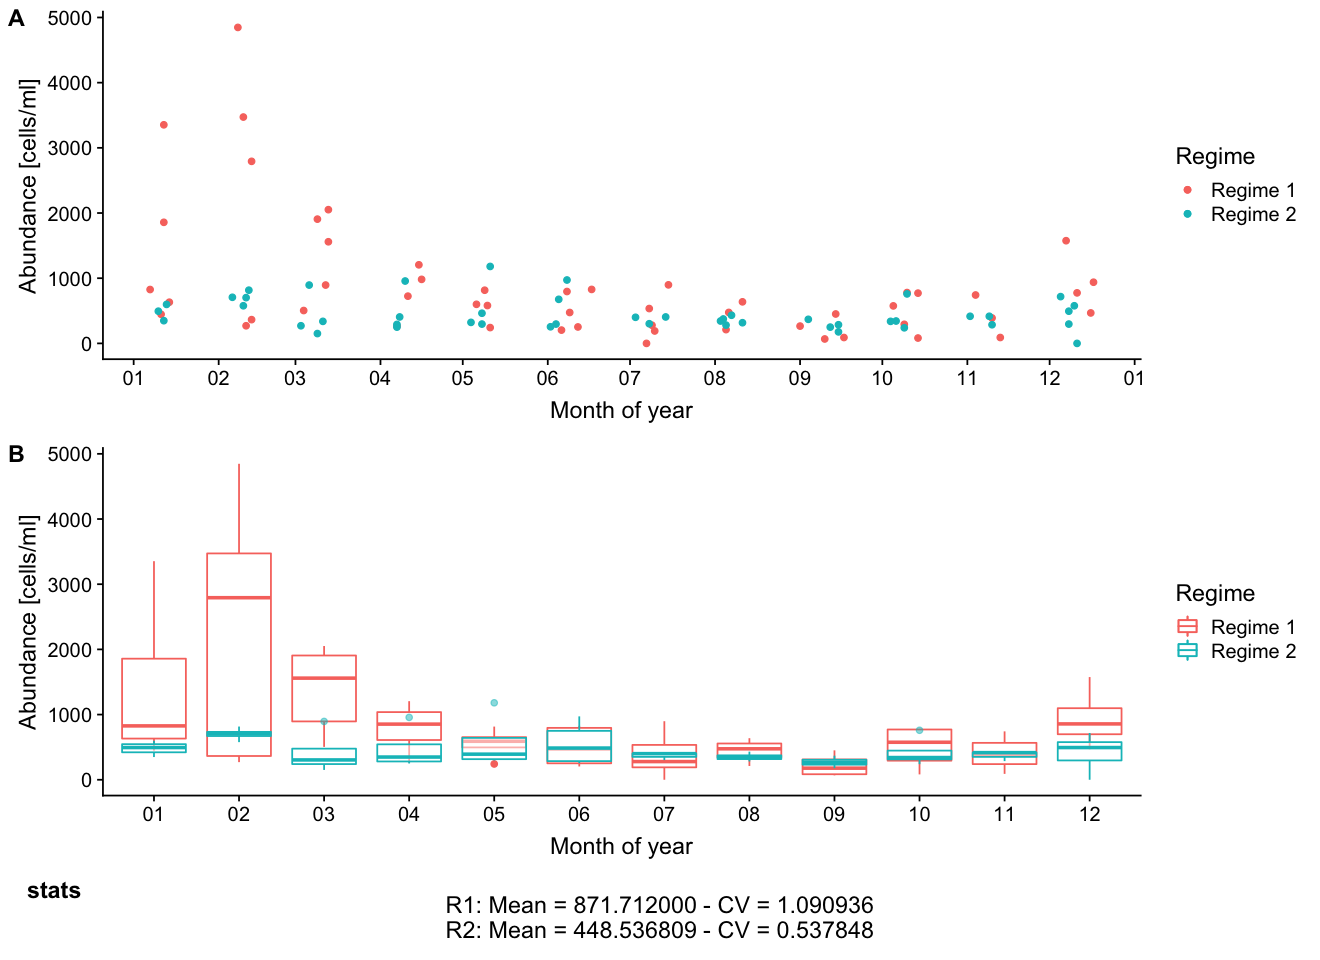

In [331]:
options(repr.plot.width=11, repr.plot.height=8)
PGAmeanR1 <- mean(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)
PGAmeanR2 <- mean(PGA_R2[PGA_R2$group == pf,]$value, na.rm=T)
PGAcvR1 <- sd(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)/mean(PGA_R1[PGA_R1$group == pf,]$value, na.rm=T)
PGAcvR2 <- sd(PGA_R2[PGA_R2$group == pf,]$value, na.rm=T)/mean(PGA_R2[PGA_R2$group == pf,]$value, na.rm=T)
PGAstats <- ggdraw() + draw_label(sprintf(" R1: Mean = %f - CV = %f \nR2: Mean = %f - CV = %f", PGAmeanR1, PGAcvR1, PGAmeanR2, PGAcvR2))
plot_grid(PGA1, PGA2, PGAstats, ncol = 1,labels = c("A", "B","stats"), rel_heights = c(1,1,0.2))

In [332]:
pf

[1] "NANOFLAGELLATES"

In [333]:
ggsave('PLOTS/Phyto_REGIMESSSSS_NANO.png', width=11, height= 8)

In [199]:
ggsave('PLOTS/Phyto_indGroup_OTHERS.png', width=11, height= 3)

Warning message:
“Transformation introduced infinite values in continuous y-axis”

# Zooplankton Abundances

In [55]:
head(zoo)

X,CRUISE,Date,YEAR,MONTH,Analyst,Mesh.Size,TOTAL.DENSITY,BIOMASS,ASH,⋯,APPENDICULARIANS,SALPS,DOLIOLIDS,BIVALVES,H.CRUSTACEA,L.ANFIOXUS,LUCIFER,JUV..GASTROPOD,yday,date
1,71,2001-10-09,2001,10,Javier Gutierrez,500,213,15.9,3.3,⋯,9.36,1.83,NA,NA,NA,,NA,,281,2001-10-09
20,72,2001-11-06,2001,11,Javier Gutierrez,500,13,2.3,0.1,⋯,0.52,0.52,NA,NA,NA,,NA,,309,2001-11-06
39,73,2001-12-11,2001,12,Javier Gutierrez,500,9,0.7,0.2,⋯,0.22,0.03,NA,0.03,0.26,,NA,,344,2001-12-11
58,74,2002-01-10,2002,1,Javier Gutierrez,500,105,4.9,0.18,⋯,0.10,18.00,NA,0.00,0.30,,0.4,,9,2002-01-10
59,74,2002-01-10,2002,1,Javier Gutierrez,200,499,10.2,0.5,⋯,3.20,37.30,NA,1.60,1.60,n.d.,NA,n.d.,9,2002-01-10
96,75,2002-02-14,2002,2,Javier Gutierrez,200,612,12.9,2.6,⋯,5.00,1.70,NA,NA,3.30,n.d.,NA,n.d.,44,2002-02-14


In [334]:
ZOOdf <- zoo %>%
  select(date, BIOMASS, Mesh.Size) %>%
  gather(key='key',value = "value", -date, -Mesh.Size)
head(ZOOdf)

date,Mesh.Size,key,value
2001-10-09,500,BIOMASS,15.9
2001-11-06,500,BIOMASS,2.3
2001-12-11,500,BIOMASS,0.7
2002-01-10,500,BIOMASS,4.9
2002-01-10,200,BIOMASS,10.2
2002-02-14,200,BIOMASS,12.9


In [366]:
dateextend<-data.frame(c(as.Date('1995-10-15'),as.Date('1996-10-15'),as.Date('1997-10-15'),as.Date('1998-10-15'),
                         as.Date('1999-10-15'),as.Date('2000-10-15'),as.Date('2001-10-15')),200,"value",NA)
names(dateextend)<-c("date","Mesh.Size","key","value")

ZOOdf_new <- rbind(ZOOdf, dateextend)
tail(ZOOdf_new)

,date,Mesh.Size,key,value
305,1996-10-15,200,value,NA
306,1997-10-15,200,value,NA
307,1998-10-15,200,value,NA
308,1999-10-15,200,value,NA
309,2000-10-15,200,value,NA
310,2001-10-15,200,value,NA


Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

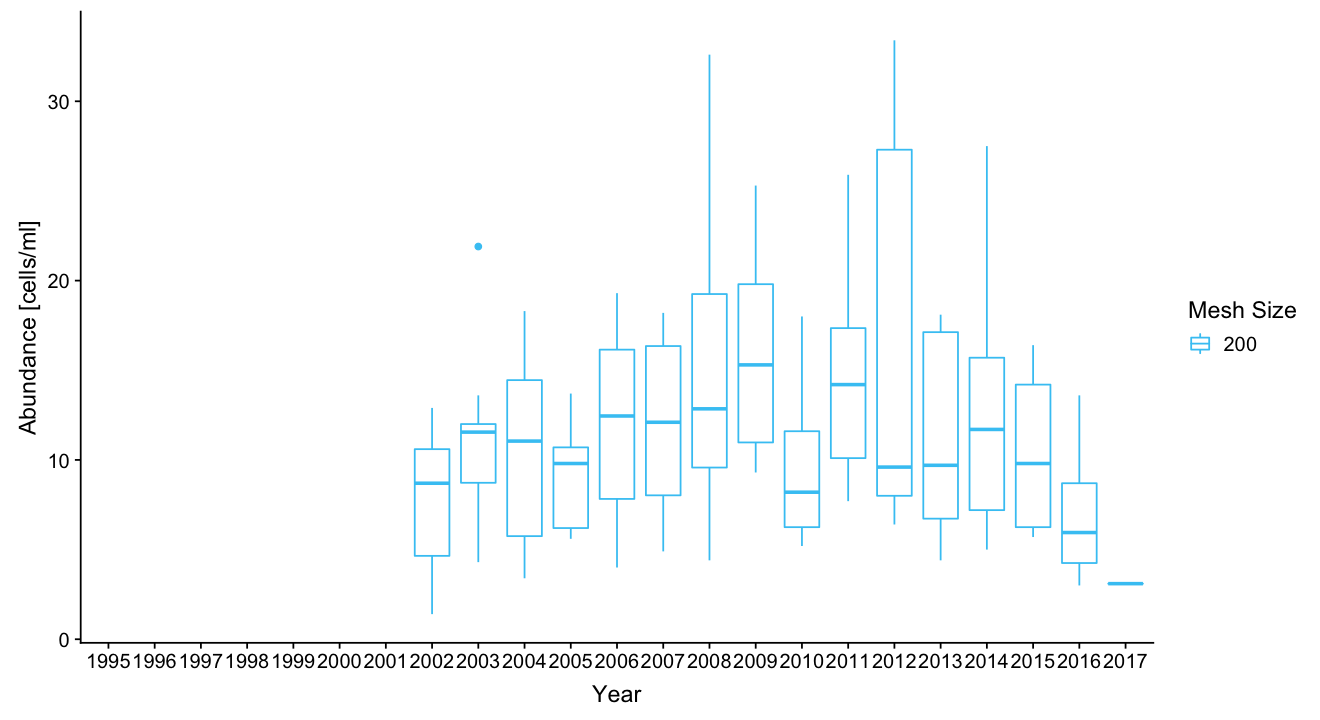

In [368]:
ZOOdf_ALLTOT <- ZOOdf_new
ZOOdf_ALLTOT$monthyear <- as.Date(format(ZOOdf_new$date, format="%Y-%m"), format="%m-%d")
ZOOdf_ALLTOT$year <- as.numeric(format(ZOOdf_new$date, format="%Y"))

options(repr.plot.width=11, repr.plot.height=6)
# plot boxplot of distribution over the year per group
ggplot(ZOOdf_ALLTOT[ZOOdf_ALLTOT$Mesh.Size == 200,]) + 
geom_boxplot(aes(x=reorder(year,monthyear), y=value, col=as.factor(Mesh.Size)))+ 
scale_color_manual(values=c("#41c7f4","#f4aa42")) +
#scale_y_continuous(trans = "reverse", limits = c(60,0), breaks=seq(60,0,-10))+
ylab('Abundance [cells/ml]') + xlab('Year') + labs(col='Mesh Size')

In [369]:
ggsave('PLOTS/ZOO_200_Boxplot_TimeSeries.png', width=11, height= 6)

Warning message:
“Removed 9 rows containing non-finite values (stat_boxplot).”

Warning message:
“Removed 67 rows containing missing values (geom_point).”

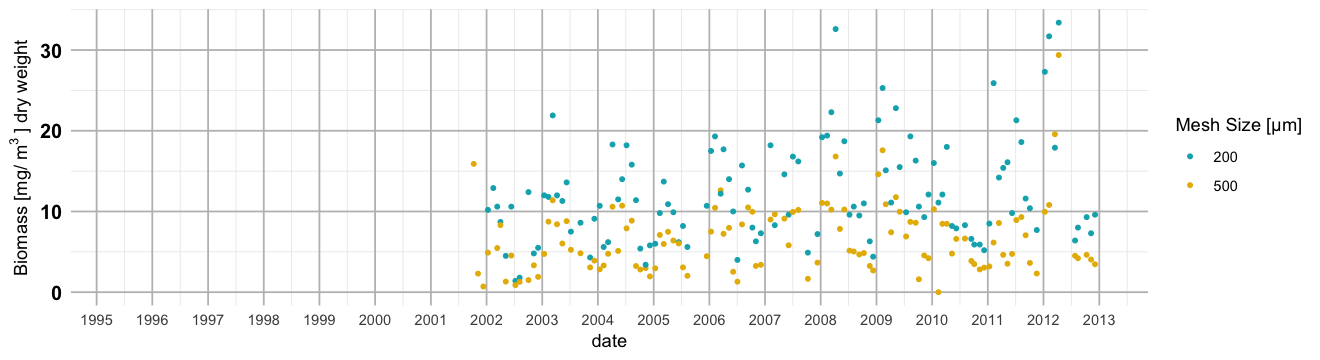

In [208]:
ggplot(ZOOdf, aes(x = date, y = value)) + 
  geom_point(aes(color = as.factor(Mesh.Size)), size = 1) + 
  scale_color_manual(values = c("#00AFBB", "#E7B800")) +
  theme_minimal()+
  theme(panel.grid.major = element_line(colour = 'grey')) +
  #scale_y_continuous(trans = "reverse", limits = c(60,0))+
  scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/6/1"), as.Date("2013/1/1")))+
    ylab(bquote('Biomass [mg '~m^-3~'] dry weight'))+ labs(color = "Mesh Size [µm]") + 
    theme(axis.text.y = element_text(face = "bold", color = "black", size = 12))#+ theme(legend.position = "none")

In [209]:
ggsave('PLOTS/ZOOplankton_all_timeseries.png', width=11, height= 3)

Warning message:
“Removed 67 rows containing missing values (geom_point).”

# look at regression here, possibily interpolate to regime 1
fit a regression through the data, and see how it changes  
look at the seasonal component, and look at multi-decadal variability  
also with the regimes  
between regimes variability should be higher  
and the within regimes variability should be lower... for example  